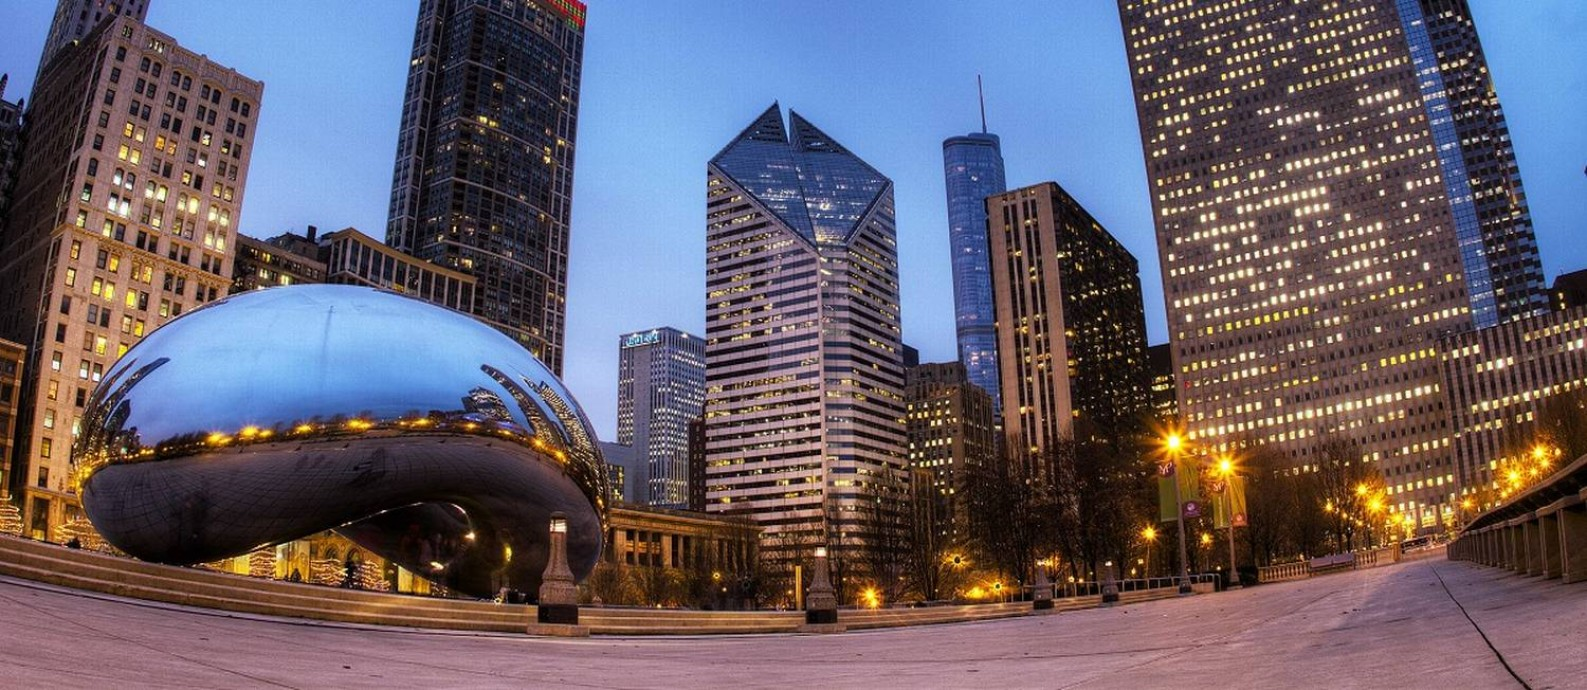


# Análise dos Dados do Airbnb - *Chicago, Illinois, United States*

O [Airbnb](https://www.airbnb.com.br/) é a **maior empresa hoteleira da atualidade**, apesar de **não possuir nenhum hotel**!

A ideia da startup que surgiu a 12 anos é conectar pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, para isso o [Airbnb](https://www.airbnb.com.br/) fornece uma plataforma inovadora que possibilita essa interação.

**Já hospedou em torno de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as maiores redes hoteleiras tradicionais.

Uma das iniciativas do [Airbnb](https://www.airbnb.com.br/) é disponibilizar seus dados do site, sobre as principais cidades do mundo. por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Esse Notebook*, onde quero analisar dados de Chicago, Illinois, United States, e ver quais insights podem ser extraídos a partir de dados brutos.**



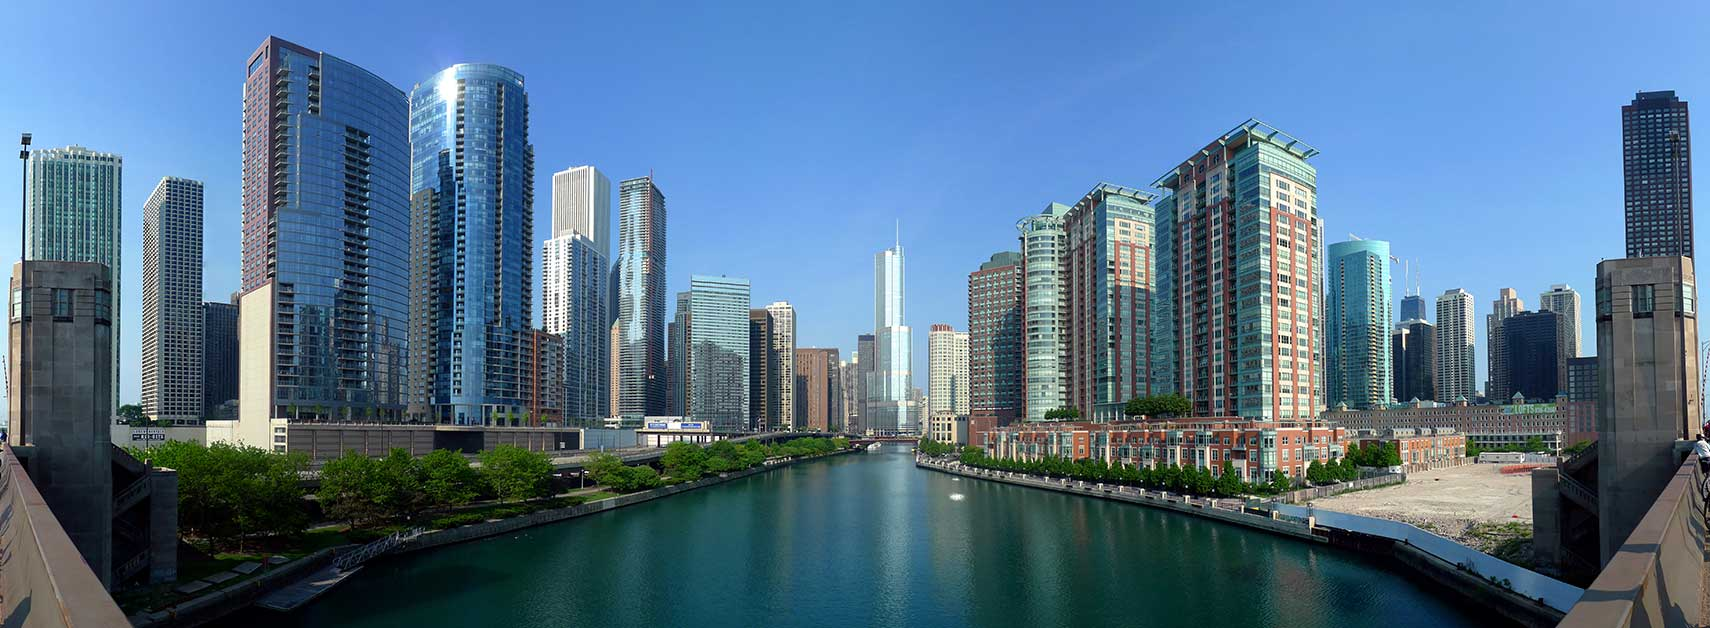

A [cidade dos ventos](https://www.trilhaseaventuras.com.br/guia-de-chicago-o-que-fazer-onde-ficar-onde-comer/), dos [musicais](https://pt.wikipedia.org/wiki/Chicago_(musical), dos [Bears](https://pt.wikipedia.org/wiki/Chicago_Bears), recebe em torno de 45,6 milhões de visitantes nacionais e estrangeiros por ano. Um dado muito importante analisando o potencial de locações para os anfritriões da cidade. 

Além das diversas atrações turisticas, dos museus, parques e prédios que contam grandes histórias sobre a cidade, todos os dias são lugares, momentos e atrações diferentes, cheia de bairros diferentes, todos com personalidades distintas e uma variedade de estereótipos próprios, como por exemplo, é dito que o [Logan Square](https://www.airbnb.com.br/s/Logan-Square/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&date_picker_type=calendar&source=structured_search_input_header&search_type=search_query) é perfeito para as pessoas mais criativas e modernas.

Chicago tem alguns dos melhores parques dos EUA, à beira do [Lago Michigan](https://pt.wikipedia.org/wiki/Lago_Michigan) é possível percorrer a trilha do [Navy Pier, que se estende por 29 quilômetros ao longo da costa e passa pelos cais norte e sul.](https://pt.wikipedia.org/wiki/Navy_Pier)

O Soldier Field Stadium, Millennium Park, Art Institute, Skyline, Centennial Wheel... são tantas opções para conhecer Chicago que daria uma lista enorme por aqui. 

Assim como as mais de 6523 opções de hospedagem que o [Airbnb](https://www.airbnb.com.br/) pode oferecer. 




## Obtenção dos Dados
A partir dos dados coletados em [Inside Airbnb](http://insideairbnb.com/get-the-data.html) fiz uma análise inicial, e retrospectiva das informações coletadas. 


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/il/chicago/2020-12-20/visualisations/listings.csv")


## Análise dos Dados
Estrutura dos principais dados disponíveis.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

In [ ]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,70,2,181,2020-10-29,2.50,1,0
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,95,2,395,2020-07-14,2.75,1,170
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,60,2,387,2020-11-16,2.77,1,0
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,53,2020-11-30,0.65,11,276
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,20,1,45,2020-09-15,0.60,2,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 6523
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.196995
last_review                       0.196995
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

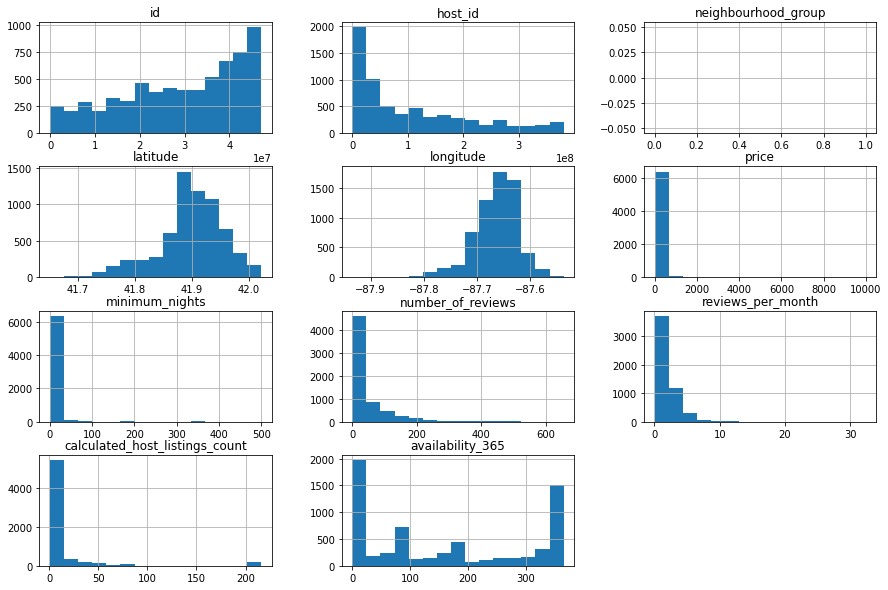

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df[['price']].describe()

,price
count,6523.000000
mean,150.062088
std,371.581453
min,0.000000
25%,60.000000
50%,94.000000
75%,150.000000
max,10000.000000


In [ ]:
(60.000000 + 94.000000 + 150.000000)/3

101.33333333333333

### **Q4. Há *outliers* presentes?**

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6523.000000,6523.000000,6523.000000,5238.000000,6523.000000,6523.000000
mean,150.062088,8.231489,41.671623,1.655939,14.447187,160.587460
std,371.581453,22.383695,67.256988,1.727131,39.621768,144.319438
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.000000,1.000000,1.000000,0.390000,1.000000,0.000000
50%,94.000000,2.000000,13.000000,1.120000,2.000000,123.000000
75%,150.000000,4.000000,53.000000,2.450000,8.000000,333.000000
max,10000.000000,500.000000,655.000000,32.410000,216.000000,365.000000


#### Boxplot para minimum_nights

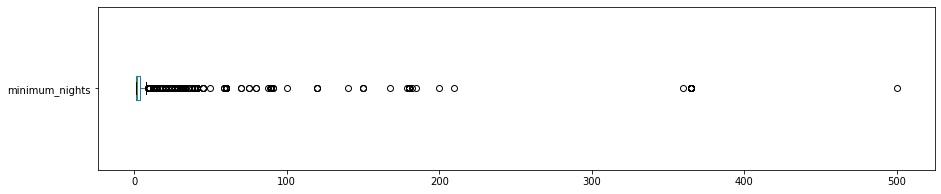

minimum_nights: valores acima de 30:
483 entradas
7.4046%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

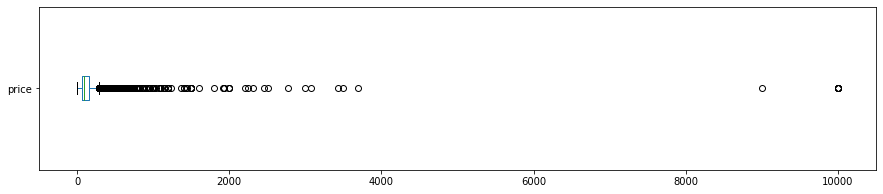


price: valores abaixo de 1000
50 entradas
0.7665%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores abaixo de 1000 para price
print("\nprice: valores abaixo de 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

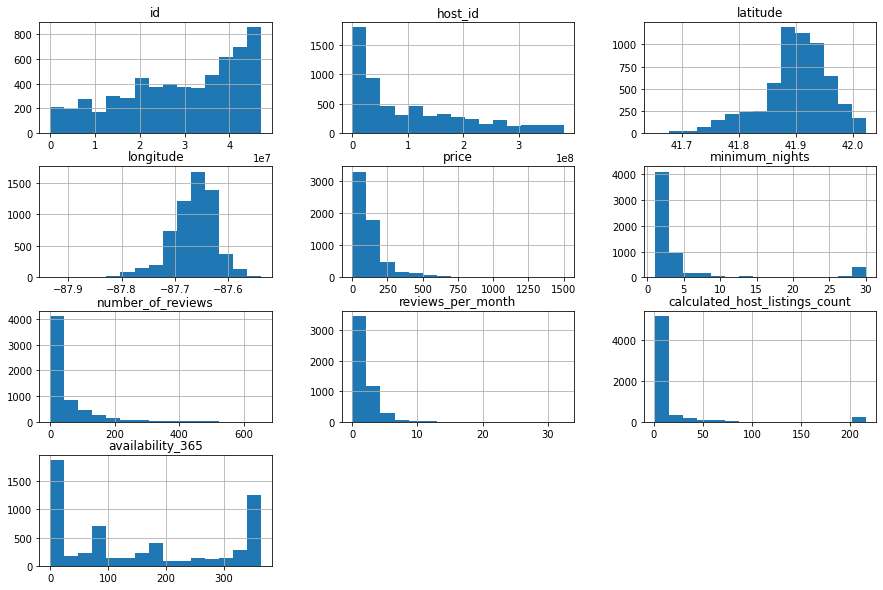

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis?**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.006593,-0.118441,-0.142793,-0.013887,0.067730
minimum_nights,-0.006593,1.000000,-0.162773,-0.186669,0.630479,0.085724
number_of_reviews,-0.118441,-0.162773,1.000000,0.712363,-0.141408,0.037373
reviews_per_month,-0.142793,-0.186669,0.712363,1.000000,-0.037827,0.064153
calculated_host_listings_count,-0.013887,0.630479,-0.141408,-0.037827,1.000000,0.130089
availability_365,0.067730,0.085724,0.037373,0.064153,0.130089,1.000000


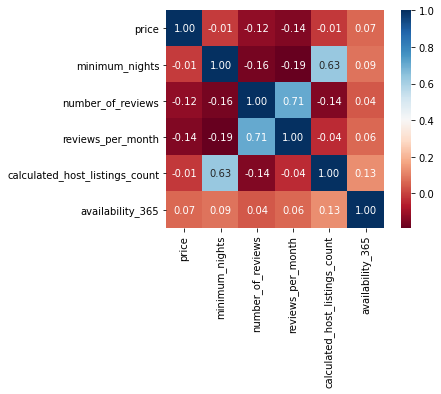

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    4100
Private room       1756
Shared room          92
Hotel room           68
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.681516
Private room       0.291888
Shared room        0.015293
Hotel room         0.011303
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Chicago?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5]

neighbourhood
West Englewood     234.375000
Near North Side    188.596939
Loop               174.257042
Oakland            163.714286
Near West Side     160.938567
Name: price, dtype: float64

In [ ]:
# ver quantidade de imóveis do Near North Side
print(df_clean[df_clean.neighbourhood == "Near North Side"].shape)

(588, 15)


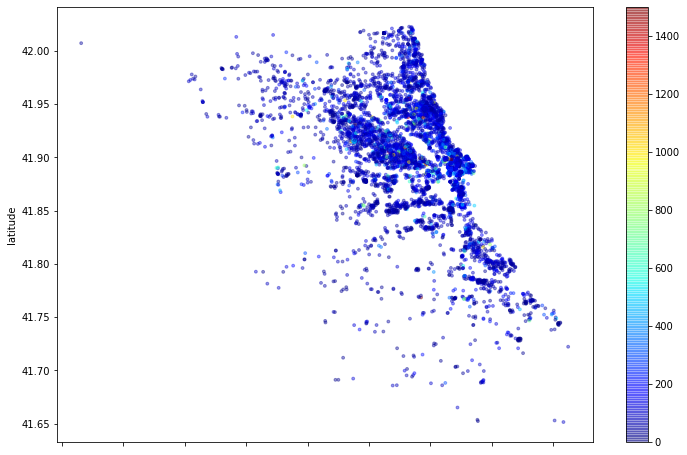

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
corr = df_clean[['minimum_nights']].corr()

display(corr)

,minimum_nights
minimum_nights,1.0


## Conclusões

Foi feita uma análise análise exploratória e de conhecimento incial, com base nos dados do [Inside Airbnb](http://insideairbnb.com/get-the-data.html) da cidade de Chicago. Uma versão resumida com os principais dados de mercado para anfitriôes e hospedes. 
Como recomendado, na próxima análise serão usados o conjunto de dados completos, com os 16 atributos disponíveis.
